### Introduction to the Jupyter Notebook: Exploring Facial Recognition through PCA

On this code file the focus is on understanding how PCA can be applied to extract significant features from facial images, enabling efficient representation and differentiation of individual faces.


1. **Data Loading and Preprocessing:**
   - First we load a dataset of facial images from a MATLAB file. This dataset includes 38 faces, where there are 62 to 64 images per face, each image represented as a column with in a matrix. Images are 32256 pixels, corresponding to 192x168 resolution.
   - The faces are then preprocessed. The preprocessing includes selecting a subset of the data for training and computing the average face, which is essential for mean normalization in PCA.

2. **Eigenfaces Computation:**
   - PCA is performed on the mean-subtracted training data to extract eigenfaces, which are essentially the principal components of the face dataset.
   - These eigenfaces represent the directions in the high-dimensional face space that have the highest variance. They form the basis for projecting faces into a lower-dimensional PCA space.

3. **Visualization of Eigenfaces and Spectrum:**
   - The first few eigenfaces are visualized to provide insights into the kinds of features captured by PCA. 
   - The spectrum of eigenvalues is also plotted to understand the variance captured by each principal component.

4. **Face Reconstruction:**
   - The notebook demonstrates how faces can be reconstructed using different numbers of eigenfaces. This illustrates the power of PCA in capturing essential features of faces with a reduced number of components.

5. **PCA Projection for Facial Differentiation:**
   - Specific faces are projected onto selected PCA modes (e.g., modes 5 and 6). This step is crucial to understand how different faces can be represented and differentiated in the PCA-transformed space.
   - These projections are visualized in a 2D plot, showcasing the ability of PCA to separate individual faces based on their unique features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
# from scipy.ndimage import imread
# from scipy.misc import imresize
from skimage.color import rgb2gray

from scipy.io import loadmat

# Load the MATLAB file
data = loadmat('../../data/allFaces.mat')


In [86]:
data['faces'].shape

(32256, 2410)

This code segment performs the initial data setup for facial image analysis:

- **Data Extraction:** The code extracts the facial images (`faces`) and the number of images per person (`nfaces`) from the loaded data. Each image is a column in the `faces` matrix, with a total resolution of 192x168 pixels.

- **Training Data Selection:** It selects images of the first 36 people as training data (`trainingFaces`) and computes the average face (`avgFace`) from these images. This average face represents common features across the dataset.

- **Average Face Display:** The average face is reshaped and displayed in grayscale, providing a visual representation of the typical features in the training dataset.

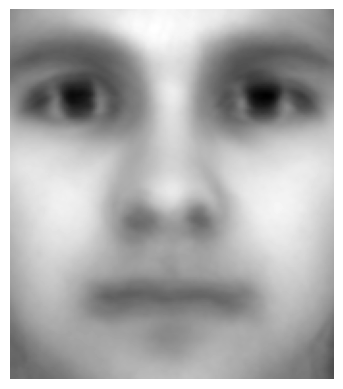

In [2]:

# Extract variables from the loaded data
faces = data['faces']
nfaces = np.ndarray.flatten(data['nfaces'])
n= data['n'][0][0] # 192
m= data['m'][0][0] # 168

# We use the first 36 people for training data
trainingFaces = faces[:, :np.sum(nfaces[:36])]
# avgFace = np.mean(trainingFaces, axis=1)[:, np.newaxis]
avgFace = np.mean(trainingFaces, axis=1) # size 192*168 by 1


# Display average face
plt.imshow(np.reshape(avgFace,(m,n)).T, cmap='gray')
plt.axis('off')
plt.show()



This code segment uses Singular Value Decomposition (SVD) to compute eigenfaces:

- **Mean Subtraction:** The average face is subtracted from the training data to centralize the dataset, a necessary step before applying PCA.

- **SVD Execution:** SVD is performed on the mean-subtracted data (`X`). This decomposition isolates the eigenfaces, which are the principal components of the face dataset, capturing the most significant variations in the facial features.

- **Randomized SVD Option:** While standard SVD is used initially, the option for Randomized SVD (rSVD) is provided, which can be faster for large datasets but might yield slightly different results.

In [3]:
from sklearn.utils.extmath import randomized_svd  # Importing randomized_svd from scikit-learn
# Compute eigenfaces on mean-subtracted training data
avgFace = avgFace.reshape(-1, 1)
X = trainingFaces - avgFace @ np.ones((1, trainingFaces.shape[1]))

# Either can use SVD or rSVD. For this work SVD brings better result but may take longer to solve.
U, S, Vt = svd(X, full_matrices=False)

# # Parameters for Randomized SVD
# r = 200
# q = 2  # Number of power iterations
# p = 200 # Oversampling parameter

# # Randomized SVD using scikit-learn's randomized_svd function
# U, S, Vt = randomized_svd(X, n_components=r, n_oversamples=p-r, n_iter=q)


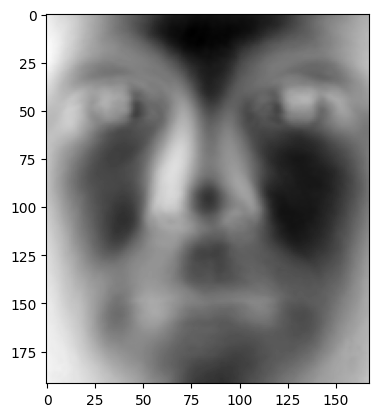

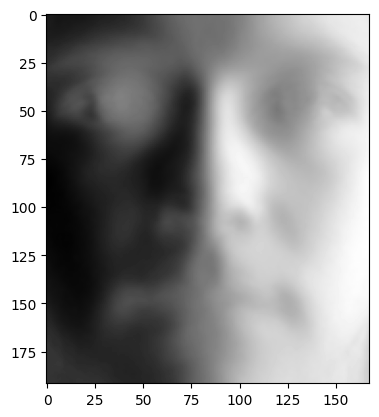

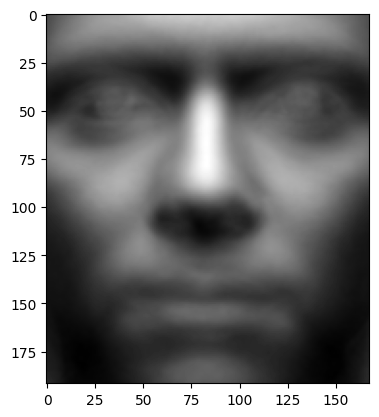

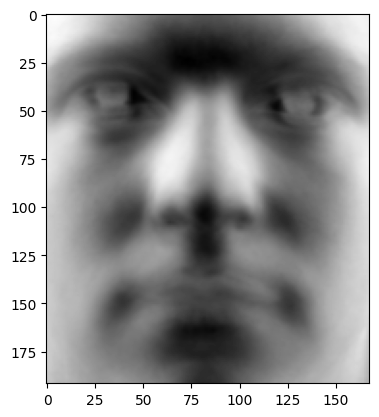

In [4]:

# Plot the first 50 eigenfaces
for i in range(4):
    plt.pause(0.1)
    plt.imshow(U[:, i].reshape(m, n).T, cmap='gray')
    plt.show()


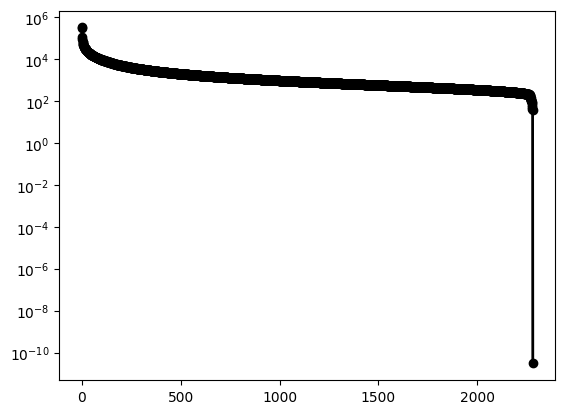

In [5]:
# Plot the spectrum of eigenvalues
plt.figure()
plt.semilogy(S, 'k-o', linewidth=2)
plt.show()


### Eigenface Reconstruction: Theoretical and Mathematical Explanation

#### Theoretical Explanation:

- **PCA in Face Recognition:** In PCA, faces are represented as points in a high-dimensional space. Eigenfaces are the principal components of this space, representing the directions of maximum variance.

- **Mean Subtraction:** The first step involves subtracting the average face from the test face. This mean subtraction centralizes the data, a necessary preprocessing step in PCA.

- **Reconstruction Process:** The reconstruction is done by projecting the mean-subtracted test face onto the eigenfaces and then reconstructing it using a certain number of these eigenfaces. This process essentially approximates the original face using a weighted combination of the eigenfaces.

Steps:

1. **Select a Test Face:**
   - `testFace = faces[:, np.sum(nfaces[:36])]` selects a face that was not included in the training set.

2. **Mean Subtraction:**
   - `testFaceMS = testFace - avgFace.ravel()`: The average face is subtracted from the test face to centralize it.

3. **Reconstruction Loop:**
   - For different values of `r` (25, 50, 400, 3200), the face is reconstructed using the first `r` eigenfaces (`U[:, :r]`).
   - **Projection:** The mean-subtracted test face (`testFaceMS`) is projected onto the space spanned by the first `r` eigenfaces. This is done by `U[:, :r].T @ testFaceMS`, which calculates the coordinates (weights) in the eigenface space.
   - **Reconstruction:** These coordinates are then used to reconstruct the face by a linear combination of the first `r` eigenfaces. This is `U[:, :r] @ (U[:, :r].T @ testFaceMS)`, which is essentially a sum of each eigenface scaled by its corresponding weight.
   - **Adding Back the Mean:** Finally, the average face is added back to the reconstruction (`avgFace.ravel() + ...`), shifting the data back from the mean-centered space to the original space.

#### Outcome:

- **Visualizing Reconstruction:** Each iteration of the loop reconstructs the face using a different number of eigenfaces. As `r` increases, the reconstruction becomes more accurate, closely approximating the original face. This demonstrates the power of eigenfaces in capturing the essential features of faces with a reduced set of components.

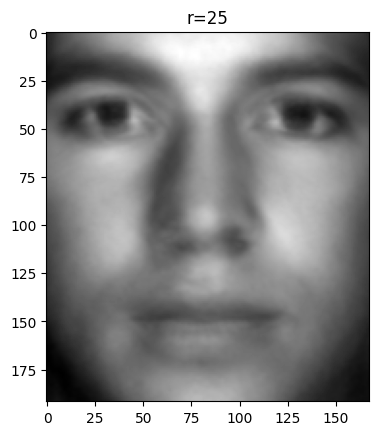

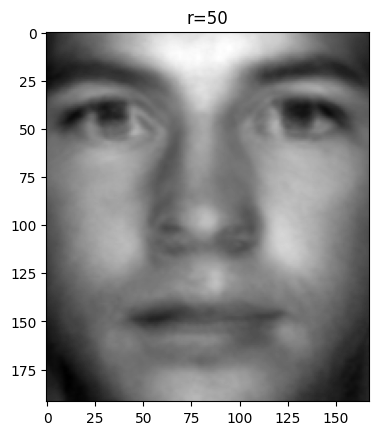

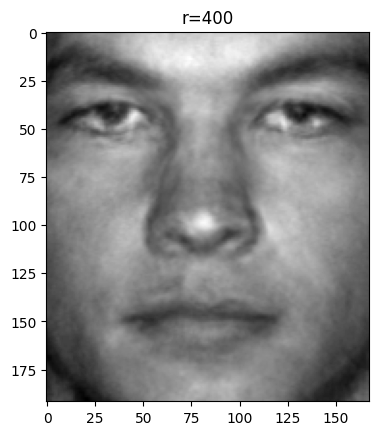

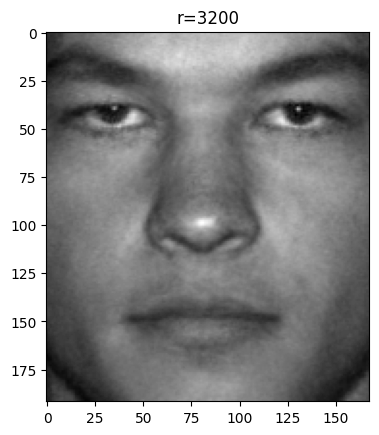

In [6]:

# Eigenface reconstruction of image that was omitted from test set
testFace = faces[:, np.sum(nfaces[:36])]
testFaceMS = testFace - avgFace.ravel()

for r in [25, 50, 400, 3200]:
    reconFace = avgFace.ravel() + U[:, :r] @ (U[:, :r].T @ testFaceMS)
    plt.imshow(reconFace.reshape(m,n).T, cmap='gray')
    plt.title(f'r={r}')
    plt.draw()
    plt.pause(0.5)


### Explanation of PCA in Facial Recognition

1. **Preprocessing Faces:** It selects faces of two individuals from a dataset and centralizes them by subtracting the average face. This step prepares the data for effective PCA application.

2. **PCA Projection and Visualization:**
   - The faces are then projected onto two specific PCA modes (the 5th and 6th). These modes are chosen for their ability to capture distinctive facial features.
   - The result is a 2D plot showing the distribution of each individual's faces in this transformed PCA space. This visualization highlights how PCA separates individual faces based on their unique characteristics.

**Key Takeaway:** This approach showcases PCA's utility in reducing complex facial data to a simpler form, emphasizing distinct features that aid in differentiating individuals. It's a prime example of PCA's role in enhancing facial recognition technologies.

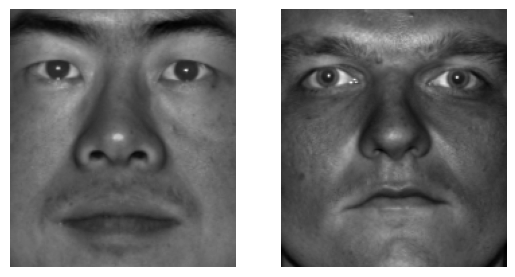

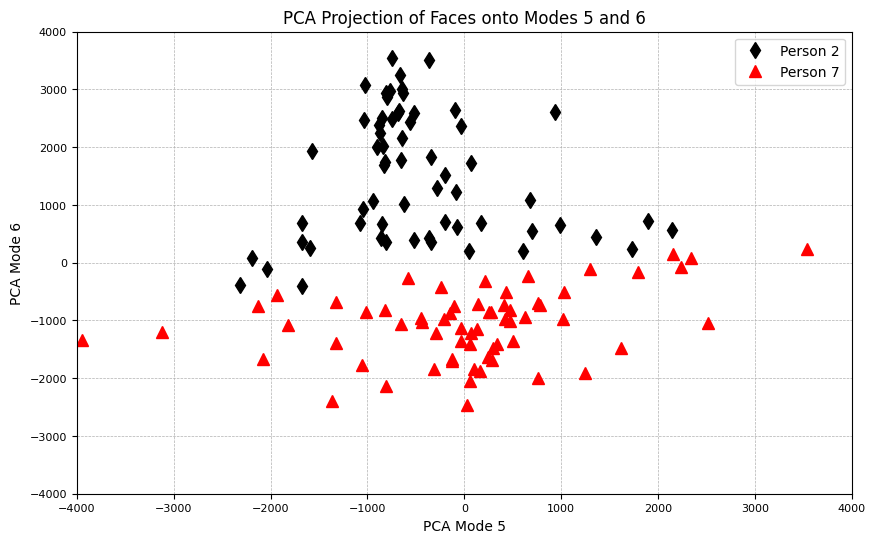

In [93]:
# Project person 2 and 7 onto PC5 and PC6
P1num, P2num = 2, 7
P1 = faces[:, np.sum(nfaces[:P1num - 1]):np.sum(nfaces[:P1num])]
P2 = faces[:, np.sum(nfaces[:P2num - 1]):np.sum(nfaces[:P2num])]

P1 = P1 - (avgFace @ np.ones((1, P1.shape[1])))
P2 = P2 - (avgFace @ np.ones((1, P2.shape[1])))

plt.subplot(1, 2, 1)
plt.imshow(P1[:, 0].reshape(m, n).T, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(P2[:, 0].reshape(m, n).T, cmap='gray')
plt.axis('off')
plt.show() 

# Project onto PCA modes 5 and 6
PCAmodes = [4, 5]  # Python uses 0-indexing
PCACoordsP1 = U[:, PCAmodes].T @ P1
PCACoordsP2 = U[:, PCAmodes].T @ P2

# Create the plot
plt.figure(figsize=(10, 6))  # Increase figure size for better visibility
plt.plot(PCACoordsP1[0, :], PCACoordsP1[1, :], 'kd', markerfacecolor='k', markersize=8, label='Person 2')
plt.plot(PCACoordsP2[0, :], PCACoordsP2[1, :], 'r^', markerfacecolor='r', markersize=8, label='Person 7')

# Enhance the plot with grid, limits, and labels
plt.axis([-4000, 4000, -4000, 4000])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_xticks(np.arange(-4000, 4001, 1000))
plt.gca().set_yticks(np.arange(-4000, 4001, 1000))
plt.gca().tick_params(axis='both', which='major', labelsize=8)

# Add labels and title for clarity
plt.xlabel('PCA Mode 5', fontsize=10)
plt.ylabel('PCA Mode 6', fontsize=10)
plt.title('PCA Projection of Faces onto Modes 5 and 6', fontsize=12)

# Add a legend to distinguish between the individuals
plt.legend(loc='upper right', fontsize=10)

# Show the plot
plt.show()


### Understanding the PCA Projection

1. **The PCA Basis (U):** 
   - `U` is the matrix of principal components obtained from PCA. Each column in `U` is a principal component of the dataset.
   - These principal components are the directions in our data that maximize variance (i.e., they capture the most significant patterns or features in the data).

2. **Selecting Specific PCA Modes:**"
   - `PCAmodes = [4, 5]` selects the 5th and 6th principal components (since Python uses 0-based indexing).
   - `U[:, PCAmodes]` extracts these specific columns from `U`.

3. **Transposing the Selected PCA Modes:**
   - `U[:, PCAmodes].T` transposes the matrix of selected principal components. This operation changes the principal components from being columns to rows.

4. **Matrix Multiplication (`@`):**
   - `@` is the operator for matrix multiplication in Python.
   - `U[:, PCAmodes].T @ P2` multiplies the transposed PCA modes matrix with `P2`, where `P2` contains the data (faces) that we want to project.

### The Result: PCA Coordinates

- The result of this matrix multiplication is `PCACoordsP2`, a new representation of the data in `P2` in the PCA-transformed space defined by the 5th and 6th principal components.
- Each column of `PCACoordsP2` represents a face from `P2`, but now described in terms of its coordinates in the PCA space rather than the original pixel space.
- This PCA space is chosen to capture significant features or variations, which are less evident in the original space.

### Why This Helps in Separation

- In the original high-dimensional space (the space of raw pixel values), the faces may not be easily separable due to the complexity and the high dimensionality.
- PCA transforms the data into a lower-dimensional space where the most important variations (like those that differentiate one face from another) are captured by the principal components.
- By projecting onto specific PCA modes, we focus on the aspects of the data that these modes represent, which can help in separating or distinguishing between different faces.
- In our case, projecting onto the 5th and 6th modes means we're examining the faces in terms of the specific variations captured by these modes, which may be particularly effective at differentiating between the individuals in `P2`.

### Visualization and Analysis

- By plotting these PCA coordinates (as we do in subsequent parts of our code), we can visually assess how well these particular PCA modes separate the different faces.
- This technique is widely used in pattern recognition, image analysis, and data compression, where understanding and visualizing the underlying structure of the data is key.